In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\HDFC.csv")

In [4]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable,delivery
0,03-01-2000,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675360e+11,NaN,NaN,NaN
1,04-01-2000,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749970e+12,NaN,NaN,NaN
2,05-01-2000,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925370e+12,NaN,NaN,NaN
3,06-01-2000,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181670e+12,NaN,NaN,NaN
4,07-01-2000,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,26-04-2021,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821800e+14,121028.0,2440395.0,0.6232
5302,27-04-2021,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,28-04-2021,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771530e+14,117425.0,1815110.0,0.5327
5304,29-04-2021,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.723000e+14,132826.0,1472924.0,0.4901


In [5]:
df['Open']=df['Open'].astype(int)
df['High']=df['High'].astype(int)
df['Low']=df['Low'].astype(int)
df['Close']=df['Close'].astype(int)


In [6]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable,delivery
0,03-01-2000,HDFC,EQ,271.75,293,293,293,293.5,293,293.50,22744,6.675360e+11,NaN,NaN,NaN
1,04-01-2000,HDFC,EQ,293.50,317,317,297,304.0,304,303.62,255251,7.749970e+12,NaN,NaN,NaN
2,05-01-2000,HDFC,EQ,304.05,290,303,285,295.0,292,294.53,269087,7.925370e+12,NaN,NaN,NaN
3,06-01-2000,HDFC,EQ,292.80,301,314,295,296.0,296,300.14,305916,9.181670e+12,NaN,NaN,NaN
4,07-01-2000,HDFC,EQ,296.45,290,296,281,287.1,286,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable,delivery
5301,26-04-2021,HDFC,EQ,2497.35,2500,2534,2483,2502.00,2509,2508.07,3916088,9.821800e+14,121028.0,2440395.0,0.6232
5302,27-04-2021,HDFC,EQ,2509.80,2494,2526,2486,2514.00,2518,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,28-04-2021,HDFC,EQ,2518.40,2516,2609,2508,2575.00,2577,2574.21,3407461,8.771530e+14,117425.0,1815110.0,0.5327
5304,29-04-2021,HDFC,EQ,2577.00,2590,2628,2533,2539.70,2538,2569.65,3005468,7.723000e+14,132826.0,1472924.0,0.4901
5305,30-04-2021,HDFC,EQ,2538.85,2503,2525,2411,2433.25,2420,2445.94,6024595,1.473580e+15,224454.0,3839105.0,0.6372


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5306 non-null   object 
 1   Symbol       5306 non-null   object 
 2   Series       5306 non-null   object 
 3   Prev Close   5306 non-null   float64
 4   Open         5306 non-null   int32  
 5   High         5306 non-null   int32  
 6   Low          5306 non-null   int32  
 7   Last         5306 non-null   float64
 8   Close        5306 non-null   int32  
 9   VWAP         5306 non-null   float64
 10  Volume       5306 non-null   int64  
 11  Turnover     5306 non-null   float64
 12  Trades       2456 non-null   float64
 13  Deliverable  4797 non-null   float64
 14  delivery     4797 non-null   float64
dtypes: float64(7), int32(4), int64(1), object(3)
memory usage: 476.8+ KB


In [9]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable,delivery
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.180173,1303.921975,1263.064644,1283.885017,1283.594233,1283.664578,1.848187e+06,2.620688e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.716842,721.321307,697.440144,709.250204,709.428425,709.109622,2.991387e+06,3.605841e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.000000,273.000000,282.850000,283.000000,283.600000,2.919000e+03,1.834690e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.000000,677.000000,660.000000,669.000000,668.000000,668.265000,3.034970e+05,2.461182e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.000000,1156.000000,1119.000000,1135.000000,1136.000000,1136.720000,1.337788e+06,1.684210e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.000000,1835.000000,1783.000000,1812.000000,1811.000000,1811.680000,2.732310e+06,3.419280e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.000000,3178.000000,3180.000000,3166.580000,1.584141e+08,1.040000e+16,538170.000000,1.483131e+08,0.989400


In [10]:
df.shape

(5306, 15)

In [11]:
df.index

RangeIndex(start=0, stop=5306, step=1)

In [12]:
df.isna().any()

Date           False
Symbol         False
Series         False
Prev Close     False
Open           False
High           False
Low            False
Last           False
Close          False
VWAP           False
Volume         False
Turnover       False
Trades          True
Deliverable     True
delivery        True
dtype: bool

In [13]:
df.isnull().sum()

Date              0
Symbol            0
Series            0
Prev Close        0
Open              0
High              0
Low               0
Last              0
Close             0
VWAP              0
Volume            0
Turnover          0
Trades         2850
Deliverable     509
delivery        509
dtype: int64

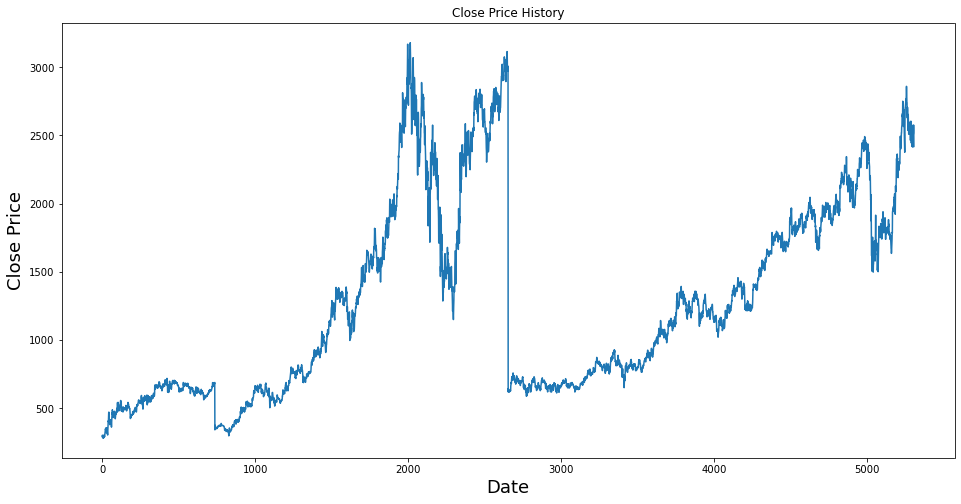

In [14]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

# Cleaning the Data

In [15]:
df.isnull().sum()

Date              0
Symbol            0
Series            0
Prev Close        0
Open              0
High              0
Low               0
Last              0
Close             0
VWAP              0
Volume            0
Turnover          0
Trades         2850
Deliverable     509
delivery        509
dtype: int64

<AxesSubplot:>

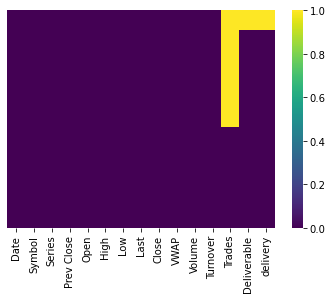

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [17]:
df.Trades=df.Trades.fillna(df.Trades.mean())
df.Turnover=df.Trades.fillna(df.Turnover.mean())
df.Volume=df.Trades.fillna(df.Volume.mean())

In [18]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable,delivery
0,03-01-2000,HDFC,EQ,271.75,293,293,293,293.5,293,293.50,102159.051303,102159.051303,102159.051303,NaN,NaN
1,04-01-2000,HDFC,EQ,293.50,317,317,297,304.0,304,303.62,102159.051303,102159.051303,102159.051303,NaN,NaN
2,05-01-2000,HDFC,EQ,304.05,290,303,285,295.0,292,294.53,102159.051303,102159.051303,102159.051303,NaN,NaN
3,06-01-2000,HDFC,EQ,292.80,301,314,295,296.0,296,300.14,102159.051303,102159.051303,102159.051303,NaN,NaN
4,07-01-2000,HDFC,EQ,296.45,290,296,281,287.1,286,288.80,102159.051303,102159.051303,102159.051303,NaN,NaN


In [19]:
df1=df.drop(['Trades','Turnover','Deliverable','delivery','VWAP','Prev Close','Date','Symbol','Series','Last'],axis=1)
df1
df1.to_csv('bank.csv')

In [20]:
df['Open']=df['Open'].astype(int)
df['High']=df['High'].astype(int)
df['Low']=df['Low'].astype(int)
df['Close']=df['Close'].astype(int)
df['Volume']=df['Volume'].astype(int)


In [21]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable,delivery
0,03-01-2000,HDFC,EQ,271.75,293,293,293,293.5,293,293.50,102159,102159.051303,102159.051303,NaN,NaN
1,04-01-2000,HDFC,EQ,293.50,317,317,297,304.0,304,303.62,102159,102159.051303,102159.051303,NaN,NaN
2,05-01-2000,HDFC,EQ,304.05,290,303,285,295.0,292,294.53,102159,102159.051303,102159.051303,NaN,NaN
3,06-01-2000,HDFC,EQ,292.80,301,314,295,296.0,296,300.14,102159,102159.051303,102159.051303,NaN,NaN
4,07-01-2000,HDFC,EQ,296.45,290,296,281,287.1,286,288.80,102159,102159.051303,102159.051303,NaN,NaN


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X=df[['High', 'Low', 'Open','Volume']]
y=df[['Close']]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train

,High,Low,Open,Volume
4810,2027,1989,1995,124835
173,525,515,525,102159
1622,1045,998,1031,102159
371,699,666,674,102159
3884,1352,1323,1327,81423
...,...,...,...,...
4931,2134,2102,2134,86913
3264,811,795,807,53655
1653,1200,1160,1173,102159
2607,2869,2830,2830,102159


# Model Buliding

In [26]:
model1=LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred

array([[1056.86577459],
       [ 358.60418772],
       [1836.90591092],
       ...,
       [ 606.53071321],
       [1278.1761671 ],
       [ 669.46019532]])

In [27]:
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
y_pred
print("By KNeighborsClassifier= ",accuracy_score(y_test,y_pred))

<ipython-input-27-f4dec99bb2f3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model2.fit(X_train,y_train)


By KNeighborsClassifier=  0.01977401129943503


In [28]:
#save the model
import pickle
import joblib
filename="bank.pkl"

model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)

pickle.dump(model3,open(filename,'wb'))

y_pred=model3.predict(X_test)
print("By DecisionTreeClassifier= ",accuracy_score(y_test,y_pred))

By DecisionTreeClassifier=  0.04896421845574388


In [29]:
model4=AdaBoostClassifier()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
y_pred
print("By AdaBoostClassifier= ",accuracy_score(y_test,y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


By AdaBoostClassifier=  0.003766478342749529


In [ ]:
model5=GradientBoostingClassifier()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
y_pred
print("By GradientBoostingClassifier= ",accuracy_score(y_test,y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
classification_report(y_test,y_pred)

# Cross Validation and Hyper Parameter Tuning


In [ ]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("By KNeighborsClassifier = ",accuracy_score(y_test,y_pred))

In [ ]:
#K-FOLD cross validation technique
from sklearn.model_selection import cross_val_score

In [ ]:
scores=cross_val_score(model1,X,y,cv=10,scoring='accuracy')

In [ ]:
scores

In [ ]:
scores.mean()

In [ ]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(),
                 {
                     'n_neighbors':[1,4,5,6,7,8,10],
                 },cv=4,return_train_score=True)

gs.fit(X,y)
gs.cv_results_

In [ ]:
df1=pd.DataFrame(gs.cv_results_)
df1

In [ ]:
df1[['param_n_neighbors','mean_test_score']]

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(KNeighborsClassifier(),
                 {
                     'n_neighbors':[1,4,5,6,7,8,10],
                 },cv=4,return_train_score=True,n_iter=4)

rs.fit(X,y)
rs.cv_results_

In [ ]:
df2 = pd.DataFrame(rs.cv_results_)
df2

In [ ]:
df2[['param_n_neighbors','mean_test_score']]

In [ ]:
rs.best_params_

In [ ]:
rs.best_score_